## Student Perfomance Analysis

### Table of Content
- [Introduction](#introduction)
- [Data Cleaning](#data_cleaning)
- [Visualization](#visualization)
- [Conclusion](#conclusion)

## <div id="introduction"></div>Introduction

#### The dataset contains 1000 entry data about student performance  which includes:
* Gender: Male or Female
* Race/ethnicity: ranging from group A to D
* Parental level of education: the level of the parent's education
* Lunch: Standard or Free/Reduce
* test preparation: if they completed their test or not
* math score: their score in math
* reading score: their scores in reading
* writing scores: their score in writing

#### Note: this data set is frictional accoding to kaggle where it was gotten from.

In [26]:
# importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [27]:
# reading the data set out from CSV into a dataframe
df= pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [28]:
# checking for the data type and statistics
df.info()
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000  

In [29]:
# checking the sample of the data to get an overview
df.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
600,female,group D,master's degree,standard,none,54,60,63
939,male,group D,some high school,standard,completed,77,68,69
617,male,group D,bachelor's degree,standard,none,88,78,83
703,female,group D,some college,standard,none,63,64,67
156,female,group E,high school,free/reduced,completed,66,74,78
45,male,group B,associate's degree,standard,none,65,54,57
73,male,group C,some high school,free/reduced,none,61,57,56
126,male,group B,some high school,standard,none,72,68,67
782,female,group B,high school,free/reduced,completed,76,85,82
654,female,group B,some high school,standard,none,73,79,79


### <div id="data_cleaning"></div>Data Cleaning
* Making a copy of the data set
* Renaming some columns
* Creating the Total Average Score from the 3 assesment test
* Creating a range from the Total Average Score using pd.cut function
* Setting the Range and Parental Education to categorical data type

In [30]:
# creating a copy to work on 
df1=df.copy()

In [31]:
# renaming columns for better representation
df1=df1.rename(columns={"race/ethnicity":"race","parental level of education":"parental_education","test preparation course":"preparation","math score":"math_score","reading score":"reading_score","writing score":"writing_score"})

In [32]:
# creating the average for the scores by first adding all test scores togther
sum_column=['math_score','reading_score','writing_score']
df1['average_score']=df1[sum_column].sum(axis=1)

# divide the average_score column by 3 to get the test average and save as an integer
df1['average_score']= (df1['average_score']/3).astype(int)

In [33]:
# creating a new column to represent the range of average scores like in report cards which can be used as position
bins=[0,49,59,69,79,89,100]
labels=['Poor','Fair','Average','Good','Very Good','Excellent']
df1['Grade']=pd.cut(df1['average_score'],bins,labels=labels)

# putting the range as a catergorical type for better arrangement during visualization
rating=['Excellent','Very Good','Good','Average','Fair','Poor']
#created how i want it arranged
rate_set = pd.api.types.CategoricalDtype(ordered=True, categories=rating)
# use the category panda function 
df1['Grade']=df1['Grade'].astype(rate_set)

In [34]:
# putting the range as a catergorical type for better arrangement during visualization
rating_edu=["some high school","high school","some college","associate's degree","bachelor's degree","master's degree"]
#created how i want it arranged
rate_set_edu = pd.api.types.CategoricalDtype(ordered=True, categories=rating_edu)
# use the category panda function 
df1['parental_education']=df1['parental_education'].astype(rate_set_edu)

In [ ]:
df1.to_csv('Student_Perfomance.csv',index=False)

## <div id="visualization"></div>Visualization of Data

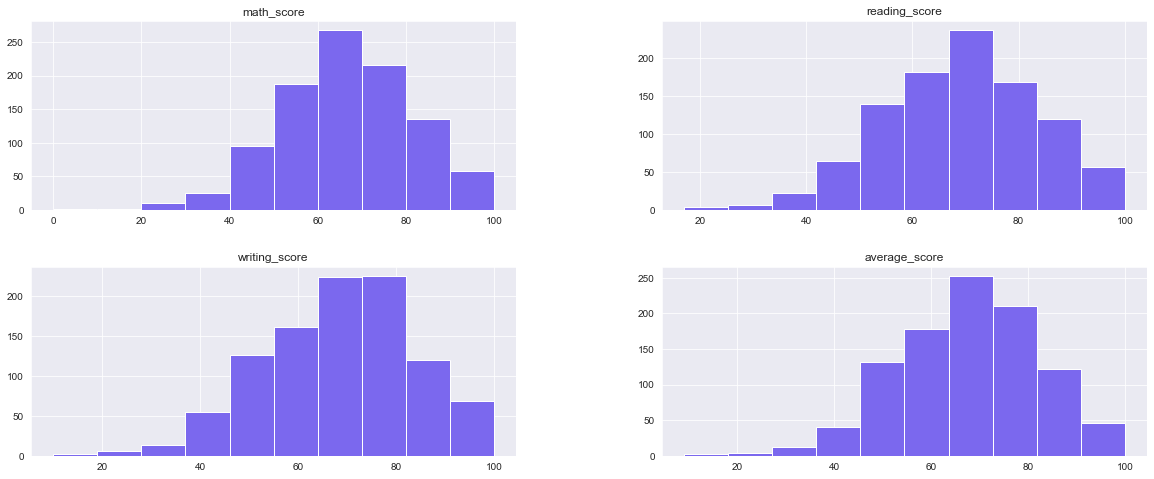

In [35]:
# creating an histogram to see the overall distribution of the score

df1.hist(figsize= (20,8),color="mediumslateblue");


#### From the distribution it is noticable that larger population of the student scores where within the range of 60-80 across all test taken

In [36]:
# creating a fuction for ploting my count plot that  accept only x varable.
def count_plot(df,x_value,color="mediumslateblue",order=None):
    '''
    The function accept 3 varables.
    
    df: the data frame
    
    x_value: the x value to plot
    
    order: order of the value
    
    '''
    # setting the fig size for ploting
    plt.figure(figsize = [10, 5])
    # ploting the function with .hist
    sns.countplot(data = df, x = x_value, edgecolor='black',color=color,order=order );
    # srtting the title for the data set
    plt.title(f'''{x_value} distribution'''.title(),fontsize=13,weight=("bold"))
    # setting the y label
    plt.ylabel('Count'.title(),fontsize=10,weight=("bold"))
    # setting the x label
    plt.xlabel(x_value.title(),fontsize=10,weight=("bold"))

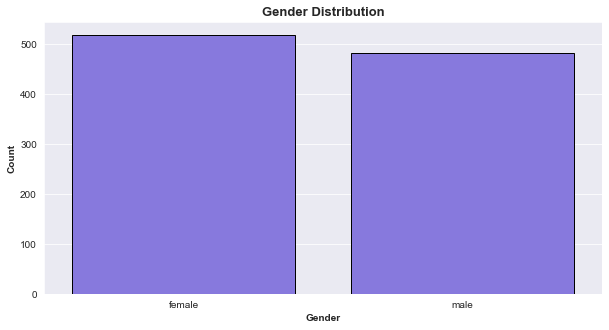

In [37]:
# creating count plot for Gender
count_plot(df1,'gender')

The Females were slightly higher in population than the Males

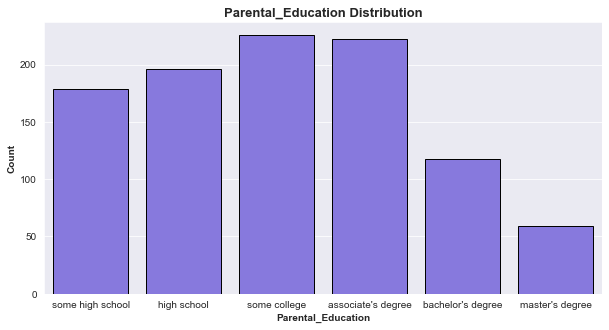

In [38]:
# Parent education count plot
count_plot(df1,'parental_education')

The distribution depicts a gradual increase in education from the parent who had some high school education towards those with some college degree being the highest along with those of associate degree. However, there was a decline in education among the parent who had bachelor's degrees and very few with master's degrees.

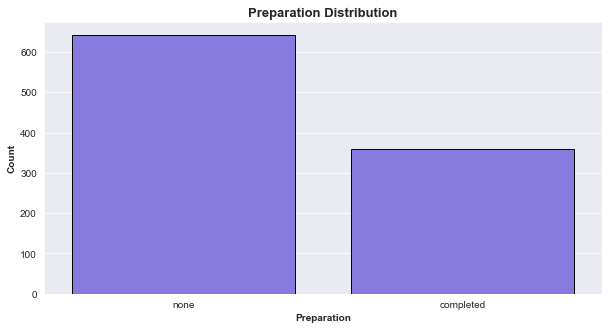

In [39]:
# preparation plot distribution
count_plot(df1,'preparation')

A sizeable number of the student did not prepare or complete their preparation.

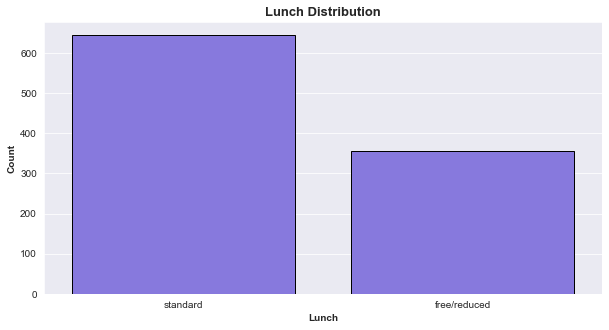

In [40]:
# count plot for lunch
count_plot(df1,'lunch')

About half of the students that received Standard lunch, had free/reduced lunch

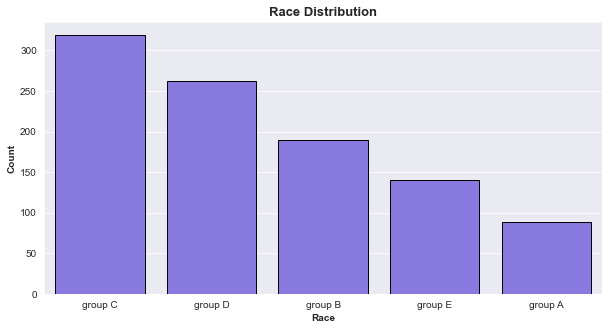

In [41]:
# creating order for our bar plot since the race column is not a categorical data, i ordered it in decending form
orders=df1['race'].value_counts().index
count_plot(df1,'race',order=orders)

More student races were in group C followed by D, B, and E  with group A being the lowest in the population.

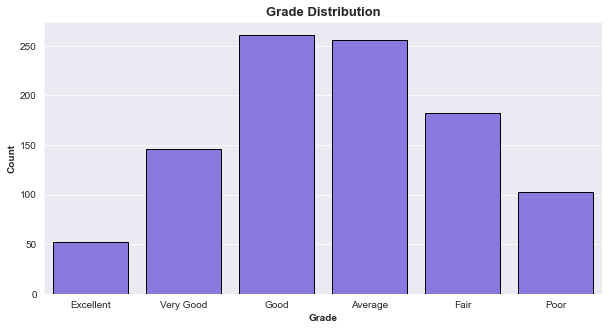

In [42]:
# count plot for Total Average score
count_plot(df1,'Grade')

Very few students had excellent grades with a high population having Good and Average total scores, while a noticeable decline happened in poor grades.

In [44]:
group=df1.groupby(['gender','preparation']).size().unstack()
group

preparation,completed,none
gender,,
female,184,334
male,174,308


Overall the number of females who did complete and did not complete their preparation was higher than the male student. 

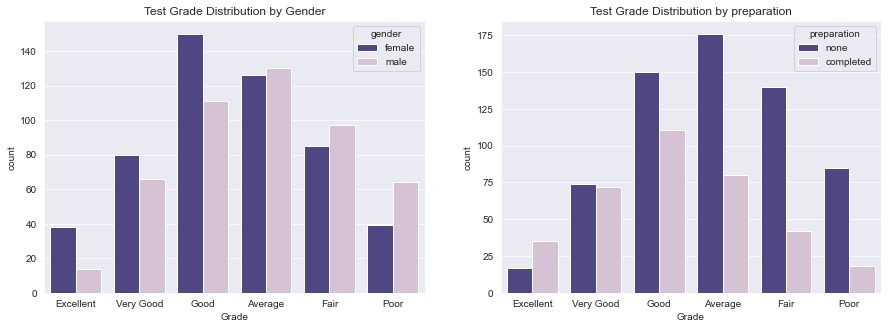

In [48]:
# ploting fig size
plt.figure(figsize=[15,5])
# stating the position of the plot
plt.subplot(1,2,1)
# creating a count plot to show grade score by gender
sns.countplot(data=df1,x='Grade',hue='gender',palette=['darkslateblue','thistle'])
plt.title('Test Grade Distribution by Gender')
# setting the second chart to be ploted
plt.subplot(1,2,2)
# count plot to show grade by preparation
sns.countplot(data=df1,x='Grade',hue='preparation',palette=['darkslateblue','thistle'])
plt.title('Test Grade Distribution by preparation');

* Higher number of Females dominated the higher grade with the highest in Good grades while the males dominated from Average to poor
* Although majority of the student did not prepar for their test, a large number who prepared had an Excellent scores

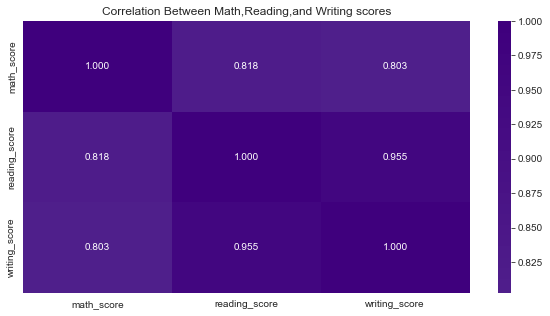

In [46]:
number_va=['math_score','reading_score','writing_score']
# correlation plot
plt.figure(figsize = [10, 5])
sns.heatmap(df1[number_va].corr(), annot = True, fmt = '.3f',
           cmap = 'Purples', center = 0)

plt.title('Correlation Between Math,Reading,and Writing scores');

The distribution between scores generally shows a positive correlation.

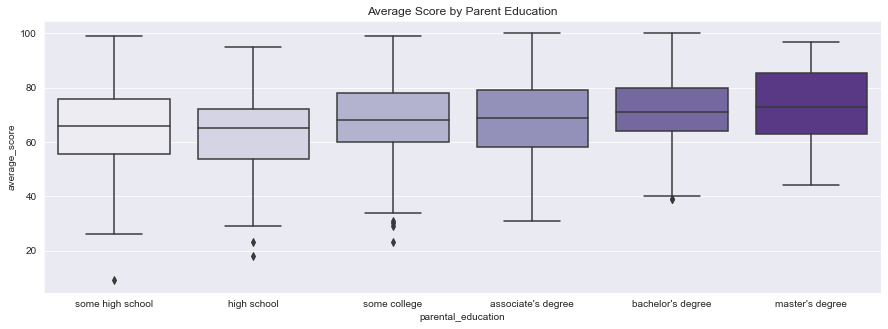

In [60]:
plt.figure(figsize = [15, 5])
sns.boxplot(data=df1,x='parental_education',y= 'average_score',palette=('Purples'))
plt.title('Average Score by Parent Education');


A significant finding here is the higher the parent's educational level, the higher the grade score apart from the student whose parents attended high schools had a slight decrease in the trend.

## <div id="conclusion"></div>Conclusion
Major key findings from the analysis are:
* The population of female students was more than the males.
* Across all test scores majority scored between 60-80, affecting their grades which shows the same distribution.
* Majority of their parents had some level of college or associate degree.
* Most students did not prepare for their tests.
* A larger population of the student received Standard lunch meals.
* In terms of their race Group C was the highest and Group A lowest.
* The females had better grades than the Males.
* For the student who had Excellent grades majority prepared
* Student whose parents had master's degrees scored higher than the rest.
